### AIM:

To explore various various techniques for word embedding, including One-Hot Encoding, Bag of Words
with CountVectorizer, Tf-Idf (term frequency-inverse document frequency), Word2Vec, and GloVe
etc.

### One-Hot Encoding

One-hot encoding is a technique used in machine learning and natural language processing to
represent categorical variables as binary vectors. It is a way to convert categorical data, which may take
on values from a discrete set, into a binary matrix with a unique column for each category.

In [1]:
import numpy as np

# Step 1: Convert Text to Lower case
text = "My Name is AKilesh"
text_lower = text.lower()

# Step 2: Tokenize the text
tokens = text_lower. split()

# Step 3: Get unique words
unique_words = set(tokens)

# Step 4: Sort the word list
sorted_words = sorted(unique_words)

# Step 5: Get the integer/position of the words
word_to_index = {word: index for index, word in enumerate(sorted_words)}

# Step 6 and 7: Create one-hot vectors and matrix
one_hot_matrix = np.zeros((len(tokens), len(unique_words)))

for i, token in enumerate(tokens):
    word_index = word_to_index[token]
    one_hot_matrix[i, word_index] = 1

# Display the results
print("Original Text:", text)
print("One-Hot Matrix:")
print(one_hot_matrix)

Original Text: My Name is AKilesh
One-Hot Matrix:
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


### Bag of Words

BoW is a representation model for text data in NLP.It treats a document as an unordered set or "bag" of
words, disregarding grammar and word order but keeping track of the frequency of each word.The basic idea is to convert text into numerical vectors, where each dimension of the vector corresponds to a
unique word in the vocabulary, and the value in each dimension represents the frequency of that word
in the document.

### CountVectorizer

CountVectorizer is a specific implementation of the BoW model in the scikit-learn library, which is a
popular machine learning library in Python.It converts a collection of text documents into a matrix of
token counts.Each row of the matrix represents a document, and each column represents a unique
word in the corpus. The matrix's entries are the word frequencies in each document.The output is a
sparse matrix where most entries are zero, as not every word in the entire vocabulary appears in every
document.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Example Sentences
sentence1 = "My Name is AKilesh"
sentence2 = "I am a student at AVV chennai"

# Step 1: Convert to Lowercase
sentence1 = sentence1.lower()
sentence2 = sentence2.lower()

# Step 2: Remove special characters and stopwords (optional)
# In this example, we'll skip this step for simplicity.

# Step 3: Create a list of sentences
corpus = [sentence1, sentence2]

# Step 4: Use CountVectorizer to create Bag of Words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Display the vocabulary and the Bag of Words matrix
print("Vocabulary:", vectorizer.get_feature_names_out())
print("Bag of Words Matrix:")
print(X.toarray())

Vocabulary: ['akilesh' 'am' 'at' 'avv' 'chennai' 'is' 'my' 'name' 'student']
Bag of Words Matrix:
[[1 0 0 0 0 1 1 1 0]
 [0 1 1 1 1 0 0 0 1]]


### Tf-Idf (term frequency-inverse document frequency)

TF-IDF, or Term Frequency-Inverse Document Frequency, is a numerical statistic that measures the
importance of a word in a document relative to a collection of documents. It combines two components:
Term Frequency (TF), which quantifies the frequency of a term in a document, and Inverse Document
Frequency (IDF), which measures the importance of a term across the entire document collection.

In [3]:
import pandas as pd
import numpy as np

# Construct a small corpus
corpus = ['data science is one of the most important fields of science',
'this is one of the best data science courses',
'data scientists analyze data']

# Create a word set for the corpus
words_set = set()

for doc in corpus:
    words = doc.split(' ')
    words_set = words_set.union(set(words))

print('Number of words in the corpus:', len(words_set))
print('The words in the corpus:\n', words_set)

# Computing Term Frequency (TF)
n_docs = len(corpus)
n_words_set = len(words_set)

df_tf =pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=list(words_set))

# Compute Term Frequency (TF)
for i in range(n_docs):
    words = corpus[i].split(' ') # Words in the document
    for w in words:
        df_tf[w][i]=df_tf[w][i] + (1/len(words))

print("Term Frequency (TF):")
print(df_tf)

# Computing Inverse Document Frequency (IDF)
print("\nInverse Document Frequency (IDF):")
idf = {}

for w in words_set:
    k = 0 # number of documents in the corpus that contain this word

    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1

    idf[w]= np.log10(n_docs /k)
    print(f'{w:>15}: {idf[w]:>10}')

# Putting it Together: Computing TF-IDF
df_tf_idf = df_tf.copy()

for w in words_set:
    for i in range(n_docs):
        df_tf_idf[w][i] = df_tf[w][i] * idf[w]

print("\nTF-IDF:")
print(df_tf_idf)

Number of words in the corpus: 14
The words in the corpus:
 {'fields', 'is', 'of', 'important', 'data', 'one', 'the', 'this', 'courses', 'science', 'analyze', 'most', 'scientists', 'best'}
Term Frequency (TF):
     fields        is        of  important      data       one       the  \
0  0.090909  0.090909  0.181818   0.090909  0.090909  0.090909  0.090909   
1  0.000000  0.111111  0.111111   0.000000  0.111111  0.111111  0.111111   
2  0.000000  0.000000  0.000000   0.000000  0.500000  0.000000  0.000000   

       this   courses   science  analyze      most  scientists      best  
0  0.000000  0.000000  0.181818     0.00  0.090909        0.00  0.000000  
1  0.111111  0.111111  0.111111     0.00  0.000000        0.00  0.111111  
2  0.000000  0.000000  0.000000     0.25  0.000000        0.25  0.000000  

Inverse Document Frequency (IDF):
         fields: 0.47712125471966244
             is: 0.17609125905568124
             of: 0.17609125905568124
      important: 0.47712125471966244
  

C:\Users\nikhi\AppData\Local\Temp\ipykernel_10596\112082855.py:29: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_tf[w][i]=df_tf[w][i] + (1/len(words))
C:\Users\nikhi\AppData\Local\Temp\ipykernel_10596\112082855.py:53: FutureWarning: Chain

### WORD2VEC

Word2Vec is a popular technique in natural language processing (NLP) that is used to represent words
as dense vectors of real numbers.Word2Vec is a shallow neural network-based model designed to learn
distributed representations of words in a continuous vector space.It captures semantic relationships
between words by placing similar words close to each other in the vector space.

In [11]:
pip install gensim --index-url=https://pypi.org/simple

  Using cached gensim-4.3.3-cp311-cp311-win_amd64.whl.metadata (8.2 kB)
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 1.2 MB/s eta 0:00:20
   - -------------------------------------- 0.8/24.0 MB 1.2 MB/s eta 0:00:20
   - -------------------------------------- 0.8/24.0 MB 1.2 MB/s eta 0:00:20
   - -------------------------------------- 1.0/24.0 MB 1.2 MB/s eta 0:00:20
   -- ------------------------------------- 1.3/24.0 MB 1.2 MB/s eta 0:00:19
   -- ------------------------------------- 1.6/24.0 MB 1.2 MB/s eta 0:00:19
   -- ------------------------------------- 1.6/24.0 MB 1.2 MB/s eta 0:00:19
   --- ------------------------------------ 1.8/24.0 MB 996.7 kB/s eta 0:00:23
   --- ------------------------------------ 2.1/24.0 MB 1.0 MB/s eta 0:00:21
   --- ------------------------------------ 2.4/24.0 MB 1.1 MB/s eta 0:00:21
   ---- --------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [5]:
!pip install spacy

In [6]:
!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.3/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.3/33.5 MB ? eta -:--:--
      -------------------------------------- 0.5/33.5 MB 730.2 kB/s eta 0:00:46
      -------------------------------------- 0.8/33.5 MB 960.2 kB/s eta 0:00:35
     - -------------------------------------- 1.0/33.5 MB 1.0 MB/s eta 0:00:33
     - -------------------------------------- 1.3/33.5 MB 1.0 MB/s eta 0:00:31
     - -------------------------------------- 1.6/33.5 MB 1.1 MB/s eta 0:00:30
     -- ------------------------------------- 1.8/33.5 MB 1.1 MB/s eta 0:00:29
     -- ------------------------------------- 2.1/33.5 MB 1.1 MB/s eta 0:00:29
     -- ------------------------------------- 2.4/33.5 MB 1.1 MB/s eta 0:00:28
     --- ------------------------------------ 2.6/33.5 MB 1.1 MB/s eta 0:00:27
     --- ------------------------------------ 2.9/33.5 MB 1.1 MB/s eta 

### GLOVE

GloVe, which stands for Global Vectors for Word Representation, is an unsupervised learning algorithm
for obtaining vector representations (embeddings) of words.GloVe is a word embedding model that
learns vector representations for words based on their global co-occurrence statistics within a given
corpus.It leverages the idea that the meaning of words can be inferred from the contexts in which they
frequently appear.

In [7]:
import spacy

# Load the pre-trained GloVe model
nlp = spacy.load("en_core_web_md")

# Test sentences
sentence1 = "I love natural language processing."
sentence2 = "GloVe is a powerful word embedding technique."

# Tokenize and get word embeddings for each sentence
doc1 = nlp(sentence1)
doc2 = nlp(sentence2)

# Print word embeddings for each word in the sentences
print("Word embeddings for sentence 1:")
for token in doc1:
    print(f"{token.text}: {token.vector}")

print("\nWord embeddings for sentence 2:")
for token in doc2:
    print(f"{token.text}: {token.vector}")

Word embeddings for sentence 1:
I: [-8.3712e-01 -4.0632e-01 -2.4202e-01 -3.7719e-01  5.5611e-03  2.9415e-01
 -2.1647e-01 -5.5052e-01 -8.1881e-02  1.5943e+00 -1.6071e-01  3.6091e-02
  2.3530e-01  7.5097e-02 -7.8328e-04 -1.1717e-01  1.5957e-01  2.6054e-01
 -1.3377e-01 -1.6710e-01  6.2175e-01  3.7112e-01  2.1664e-01 -2.3209e-01
 -8.2718e-02 -4.8991e-01 -2.6890e-01 -2.8994e-01  3.8026e-01 -1.7523e-01
  1.2028e-01  4.9040e-01 -1.7865e-01  1.2088e-01 -7.1101e-02  1.4119e-02
  1.4036e-01  8.7899e-02 -2.0833e-01  7.2154e-01 -3.2725e-01 -3.2122e-02
 -2.6132e-01  2.5442e-01  2.4288e-01 -1.5638e-01  3.1056e-01  3.6157e-01
 -5.4107e-01  4.2562e-01  5.0322e-02  3.1541e-01 -1.7380e-01  1.5163e-01
 -2.8188e-01  1.6727e-01  5.2491e-03 -1.8264e-01  3.1250e-01 -3.9406e-01
 -2.2052e-01  1.6621e-01 -2.4805e-01  1.3944e-01  3.9975e-01 -2.6014e-01
 -1.0253e-01  3.4850e-02 -1.0421e-01 -1.6384e-01 -1.4500e-02  1.3267e-01
  5.5815e-01 -1.5814e-01 -6.0617e-01  3.1015e-01 -9.9910e-02 -1.2486e-01
 -1.5990e-01  6.

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Define a list of strings as your sample text
x = ['text', 'the', 'leader', 'prime', 'natural', 'language']

# Create the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

# Number of unique words in the dictionary
print("Number of unique words in the dictionary =", len(tokenizer.word_index))
print("Dictionary is =", tokenizer.word_index)

# Function to create an embedding matrix for the vocabulary
def embedding_for_vocab(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding 1 for the reserved 0 index

    # Initialize the embedding matrix with zeros
    embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))

    # Load the GloVe embeddings
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix_vocab

# Define the embedding dimension
embedding_dim = 100

# Provide the path to the GloVe file (ensure the file is in your working directory or specify the full path)
glove_filepath = 'glove.6B.100d.txt'

# Generate the embedding matrix for the given GloVe file
embedding_matrix_vocab = embedding_for_vocab(glove_filepath, tokenizer.word_index, embedding_dim)

# Print the dense vector for the first word in the vocabulary
first_word = list(tokenizer.word_index.keys())[0]
first_word_idx = tokenizer.word_index[first_word]
print(f"Dense vector for the word '{first_word}' is:\n", embedding_matrix_vocab[first_word_idx])


Number of unique words in the dictionary = 6
Dictionary is = {'text': 1, 'the': 2, 'leader': 3, 'prime': 4, 'natural': 5, 'language': 6}
Dense vector for the word 'text' is:
 [-0.49704999  0.71641999  0.40119001 -0.05761     0.83613998  0.82560003
  0.08963    -0.53491998  0.34334999 -0.27079001 -0.011152    0.025207
 -0.1235      0.11801     0.045312    0.73144001  0.13744    -0.13084
 -0.028249   -0.30789    -0.81863999 -0.54517001  0.25150999  0.53890997
  0.38293001 -1.03429997 -0.1104      0.44977    -0.13019     0.24846999
  0.1048      0.19566999 -0.42671999 -0.37911999  0.14534999 -0.025532
 -0.23523    -0.36379999 -0.14269     0.0062072  -0.63       -0.23068
  0.086461    0.22126    -0.65625    -0.55700999 -0.60242999 -0.13158999
 -0.027226    0.0044152   1.41229999  1.30420005  0.54118001  0.33443001
 -0.51865    -1.82529998 -0.30524999 -0.32747     1.23599994  0.08771
  0.007793    0.36570999 -0.39304    -0.79174     0.57874    -0.0025427
  0.10442     0.64165998 -0.1881    

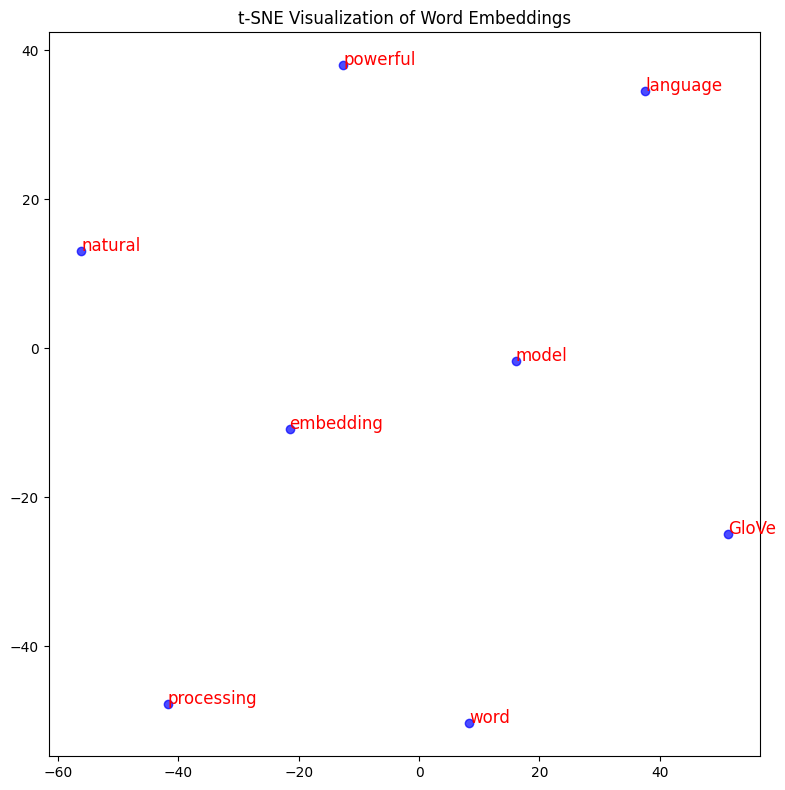

In [9]:
import spacy
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Load the pre-trained GloVe model via SpaCy
nlp = spacy.load("en_core_web_md")

# List of words for visualization
words_to_visualize = ["natural", "language", "processing", "GloVe", "powerful", "word", "embedding", "model"]

# Get word embeddings for the selected words
word_vectors = [nlp(word).vector for word in words_to_visualize]

# Convert word_vectors to a NumPy array
word_vectors_array = np.array(word_vectors)

# Ensure perplexity is less than the number of samples
perplexity = min(30, len(word_vectors_array) - 1)

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors_array)

# Plot the words in 2D space
plt.figure(figsize=(8, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color="blue", alpha=0.7)

# Annotate each point with the corresponding word
for i, word in enumerate(words_to_visualize):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12, color="red")

plt.title("t-SNE Visualization of Word Embeddings")
plt.tight_layout()
plt.show()


### FAST TEXT

In [18]:
from nltk.tokenize import word_tokenize
from gensim.models import FastText

# Dummy sentences
sentences = [
"This is a sample sentence for FastText.",
"FastText is a powerful word embedding model.",
"We can train FastText on custom sentences too.",
"Creating a simple example for demonstration.",
"Let's check the similarity of some words.",

]

# Tokenize the sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train FastText model
model = FastText(
sentences=tokenized_sentences,
vector_size=128,
window=5,
min_count=1, # Adjust min_count as needed
workers=4,
epochs=10,
seed=42,
sg=1,

)

# Save the trained model
model.save('dummy_fasttext_model' )

# Access the word vectors
ftext = model.wv

# Check the number of unique words in the model
print("Number of unique words:", len(ftext.index_to_key))

# Check the vector size
print("Vector size:", ftext.vector_size)

# Get the vector for a specific word
word_vector = ftext["fasttext"]
print("Vector for 'fasttext':", word_vector)

# Find similar words
similar_words_mantap = ftext.similar_by_word("mantap", topn=5)
print("Similar words to 'mantap':", similar_words_mantap)

similar_words_bagus = ftext.similar_by_word("bagus", topn=5)
print("Similar words to 'bagus':", similar_words_bagus)

Number of unique words: 31
Vector size: 128
Vector for 'fasttext': [-4.98031732e-04  1.72681102e-04 -8.47386254e-05  2.27859756e-03
  8.92896263e-04  3.49581242e-04 -8.55057617e-04 -3.98599310e-04
  9.64064617e-04 -6.45174470e-04  2.88390846e-04  5.65262453e-05
 -4.23705875e-04 -6.82594546e-04  8.28830409e-04  1.00176083e-03
 -2.00148323e-03  1.73650682e-03 -1.29093463e-03  3.55957483e-04
  4.24317222e-05 -8.21459282e-04 -2.77078041e-04 -6.49649184e-04
  8.73517536e-04 -3.08861985e-04 -7.99137109e-04 -1.82663347e-03
  1.87556288e-04  1.25339910e-04 -2.63656111e-04 -8.55624385e-04
  5.55895036e-04  7.09098938e-04  7.98384601e-04 -1.77128322e-03
  6.98002870e-04 -5.98518935e-04  1.86768814e-03  6.84162660e-04
  4.83201758e-04  1.39986238e-04 -6.21701882e-04 -5.26229327e-04
 -1.06013427e-03  4.31456428e-04 -2.71964062e-04  1.07383115e-04
  6.34527169e-05  1.15913659e-04  3.46912799e-04 -1.37849152e-03
 -5.68136165e-04 -1.15422753e-03  5.61428722e-04  1.03809393e-03
 -7.31351494e-04 -2.821